In [1]:
import pandas as pd
from coronavirus_tweets import read_csv_3, get_sentiments, second_most_popular_sentiment, date_most_popular_tweets, lower_case, remove_non_alphabetic_chars, remove_multiple_consecutive_whitespaces, tokenize, count_words_with_repetitions, count_words_without_repetitions, remove_stop_words, stemming, frequent_words, mnb_predict, mnb_accuracy
# Assuming 'data_file' is a string with the path to your CSV file:
# nltk data downloads
# Assuming all the functions have been defined as provided above in the text cell
# and the nltk data (punkt, stopwords) has been downloaded.

# Step 1: Load the dataset and perform initial analysis
data_file = 'data/coronavirus_tweets.csv'

df = read_csv_3(data_file)

# Get the list of possible sentiments
sentiments = get_sentiments(df)

# Get the second most popular sentiment
second_popular = second_most_popular_sentiment(sentiments)

# Get the date with the most 'Extremely Positive' tweets
most_positive_date = date_most_popular_tweets(df)

# Print out the results
print(f"Possible sentiments: {sentiments}")
print(f"Second most popular sentiment: {second_popular}")
print(f"Date with most 'Extremely Positive' tweets: {most_positive_date}")



Possible sentiments: Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64
Second most popular sentiment: Negative
Date with most 'Extremely Positive' tweets: 2020-03-25


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eagua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eagua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\eagua\OneDrive\Documents\GitHub\6CCS3COV-7CCSMCVI-Computer-Vision\DM_Project\coronavirus_tweets.py:34: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


In [1]:
import pandas as pd
from coronavirus_tweets import read_csv_3, get_sentiments, second_most_popular_sentiment, date_most_popular_tweets, lower_case, remove_non_alphabetic_chars, remove_multiple_consecutive_whitespaces, tokenize, count_words_with_repetitions, count_words_without_repetitions, remove_stop_words, stemming, frequent_words, mnb_predict, mnb_accuracy

# Assuming 'data_file' is a string with the path to your CSV file:
data_file = 'data/coronavirus_tweets.csv'

# Step 1: Load the dataset and perform initial analysis
df = read_csv_3(data_file)

# Get the list of possible sentiments
sentiments = get_sentiments(df)

# Get the second most popular sentiment
second_popular = second_most_popular_sentiment(sentiments)

# Get the date with the most 'Extremely Positive' tweets
most_positive_date = date_most_popular_tweets(df)

# Print out the results
print(f"Possible sentiments: {sentiments}")
print(f"Second most popular sentiment: {second_popular}")
print(f"Date with most 'Extremely Positive' tweets: {most_positive_date}")

# Preprocess the tweets
df = lower_case(df)
df = remove_non_alphabetic_chars(df)
df = remove_multiple_consecutive_whitespaces(df)
df = tokenize(df)

# Count words
total_word_count = count_words_with_repetitions(df)
distinct_word_count = count_words_without_repetitions(df)
most_common_words = frequent_words(df, 10)

# Output the results
print(f"Total word count (with repetitions): {total_word_count}")
print(f"Distinct word count: {distinct_word_count}")
print(f"10 most frequent words: {most_common_words}")
print(df.head())

df = remove_stop_words(df)
print(df.head())

df = stemming(df)
print(df.head())

# Build and evaluate the Multinomial Naive Bayes classifier
# Build and evaluate the Multinomial Naive Bayes classifier
y_pred, y_true = mnb_predict(df)
accuracy = mnb_accuracy(y_pred, y_true)
print(f"Multinomial Naive Bayes accuracy: {accuracy}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eagua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eagua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\eagua\OneDrive\Documents\GitHub\6CCS3COV-7CCSMCVI-Computer-Vision\DM_Project\coronavirus_tweets.py:35: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


Possible sentiments: Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64
Second most popular sentiment: Negative
Date with most 'Extremely Positive' tweets: 2020-03-25
Total word count (with repetitions): 1351476
Distinct word count: 80067
10 most frequent words: ['the', 'to', 't', 'co', 'and', 'https', 'covid', 'of', 'a', 'in']
   UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Austral

Dataset loaded successfully.
First few rows of the DataFrame:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

Summary statistics:
                   mean    std  min     max
Fresh             12000  12647    3  112151
Milk               5796   7380   55   73498
Grocery            7951   9503    3   92780
Frozen             3072   4855   25   60869
Detergents_Paper   2881   4768    3   40827
Delicassen         1525   2820    3   47943
Clustering evaluation results:
       Algorithm   k  Silhouette Score
0         KMeans   3          0.333917
1  Agglomerative   3          0.264609
2         KMeans   5          0.371628
3  Agglomerative   5          0.239884
4         K

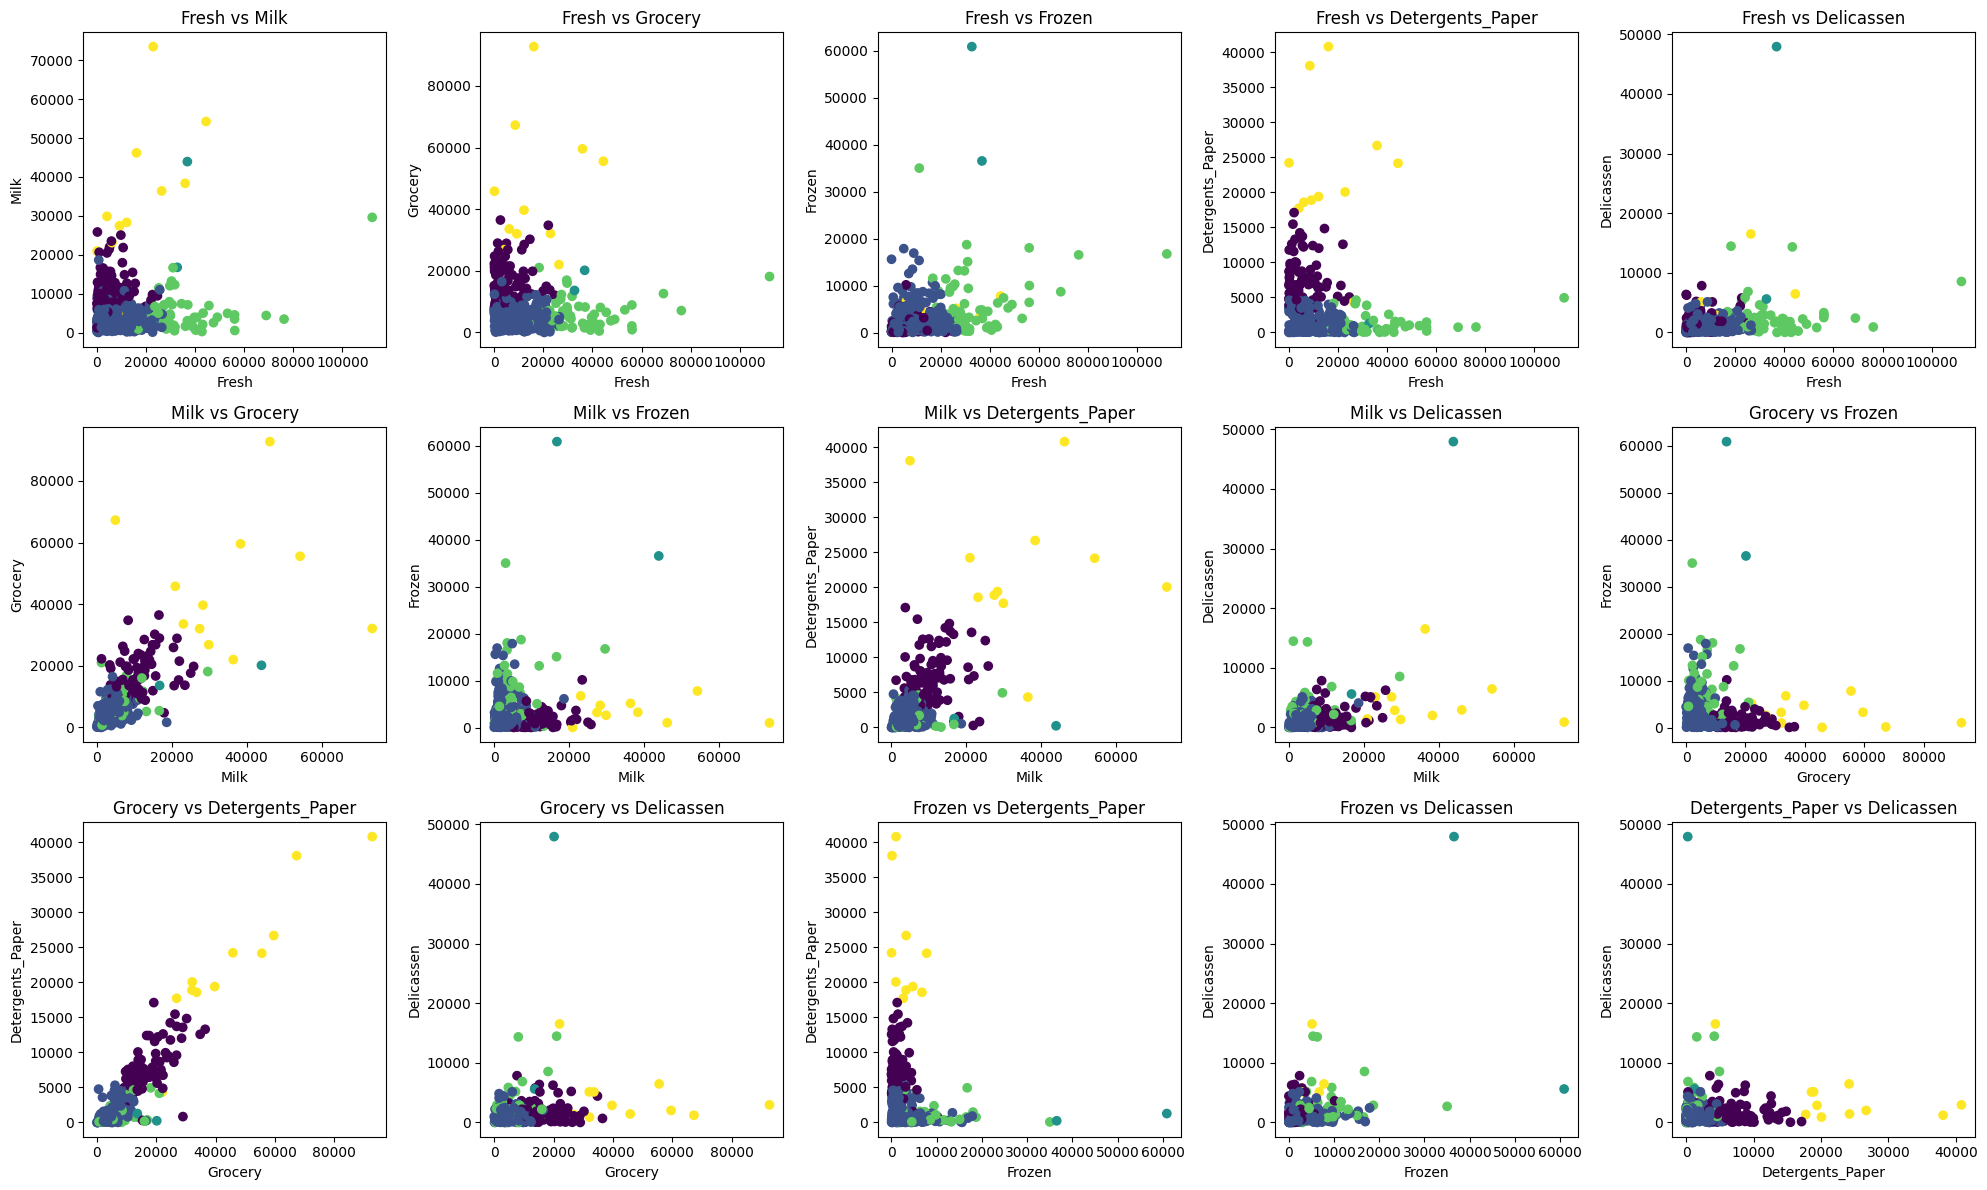

In [3]:
# Cluster Analysis Notebook
from wholesale_customers import read_csv_2, summary_statistics, standardize, kmeans, best_clustering_score, agglomerative, scatter_plots, cluster_evaluation
# Load the dataset
data_file = 'data/wholesale_customers.csv'
df = read_csv_2(data_file)
print("Dataset loaded successfully.")

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Compute the mean, standard deviation, minimum, and maximum value for each attribute
summary_stats = summary_statistics(df)
print("\nSummary statistics:")
print(summary_stats)

# Standardize the data set before clustering
standardized_df = standardize(df)

# Assuming 'your_module_name' is the name of the Python file (module) where your functions are defined.
# For example, if your file is named 'wholesale_customers_analysis.py', replace 'your_module_name' with 'wholesale_customers_analysis'

# Perform cluster evaluation
results_df, best_score, best_labels = cluster_evaluation(df)

# Display the results DataFrame
print("Clustering evaluation results:")
print(results_df)

# Find and print the best silhouette score using the 'best_clustering_score' function
max_silhouette_score = best_clustering_score(results_df)
print(f"\nThe best silhouette score is: {max_silhouette_score}")

# Since 'cluster_evaluation' already returns the best score and labels,
# you could directly use them for further analysis or visualization:
print(f"\nUsing directly obtained best score: {best_score}")

# Visualize the best set of clusters
scatter_plots(df, best_labels)

